## Preprocessing pipeline 

the pipeline is created on a single subject

In [1]:
import numpy as np

In [2]:
%cd ..

/Users/alessiadeponti/Desktop/dynamic-cd-fmri


In [3]:
from src.preprocessing import load_timeseries, sliding_window, bandpass_filter, zscore, compute_node_features
from src.graph_contruction import apply_threshold, build_dynamic_graphs, save_graphs

In [4]:
file_path = 'data/raw/100206.txt'   #path to first subject

In [5]:
data = load_timeseries(file_path=file_path)
filtered = bandpass_filter(data, low=0.01, high=0.1, fs=1/0.72)
print(f"Filtered data shape: {filtered.shape}")
zscored = zscore(filtered, axis=0)
print(f"Z-scored data shape: {zscored.shape}")
windowed= sliding_window(zscored, window_size=30, step=10)
print(f"Windowed data shape: {windowed.shape}")


Filtered data shape: (4800, 200)
Z-scored data shape: (4800, 200)
Windowed data shape: (478, 200, 200)


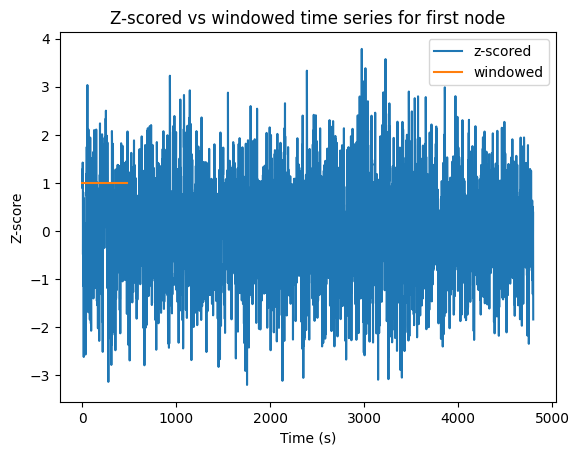

In [6]:
import matplotlib.pyplot as plt
plt.plot(zscored[:, 0], label='z-scored')
plt.plot(windowed[:, 0, 0], label='windowed')
plt.legend()
plt.title('Z-scored vs windowed time series for first node')
plt.xlabel('Time (s)')
plt.ylabel('Z-score')
plt.show()  


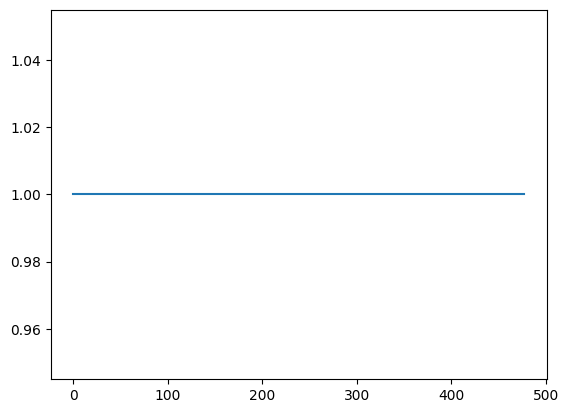

In [7]:
plt.plot(windowed[:, 2, 2], label='windowed')

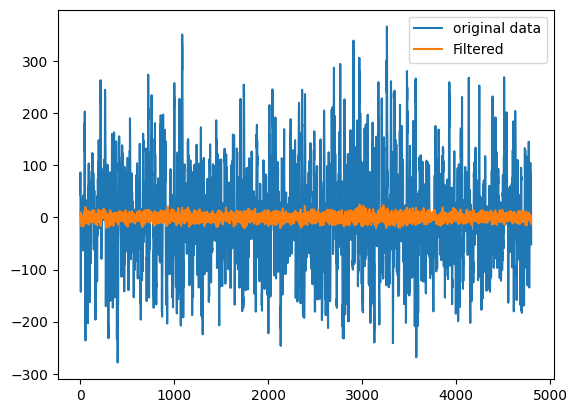

In [8]:
plt.plot(data[:, 0], label='original data')
plt.plot(filtered[:, 0], label='Filtered')

plt.legend()
plt.show()

Computed features shape: (200, 4)


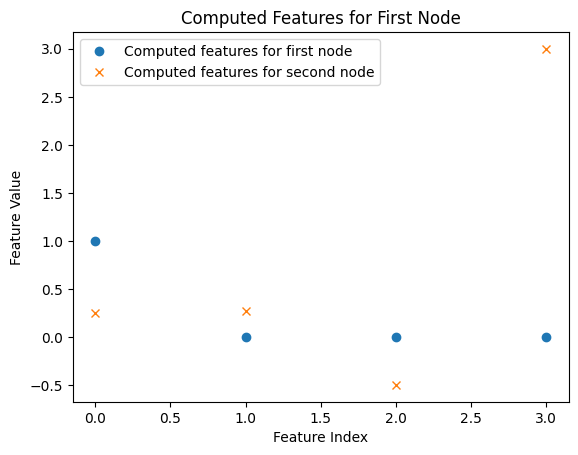

In [9]:
features = compute_node_features(windowed[:, :, 0])
print(f"Computed features shape: {features.shape}")
plt.plot(features[0, :], label='Computed features for first node', linestyle='none', marker='o')
plt.plot(features[1, :], label='Computed features for second node', linestyle='none', marker='x')
plt.legend()
plt.title('Computed Features for First Node')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_ol

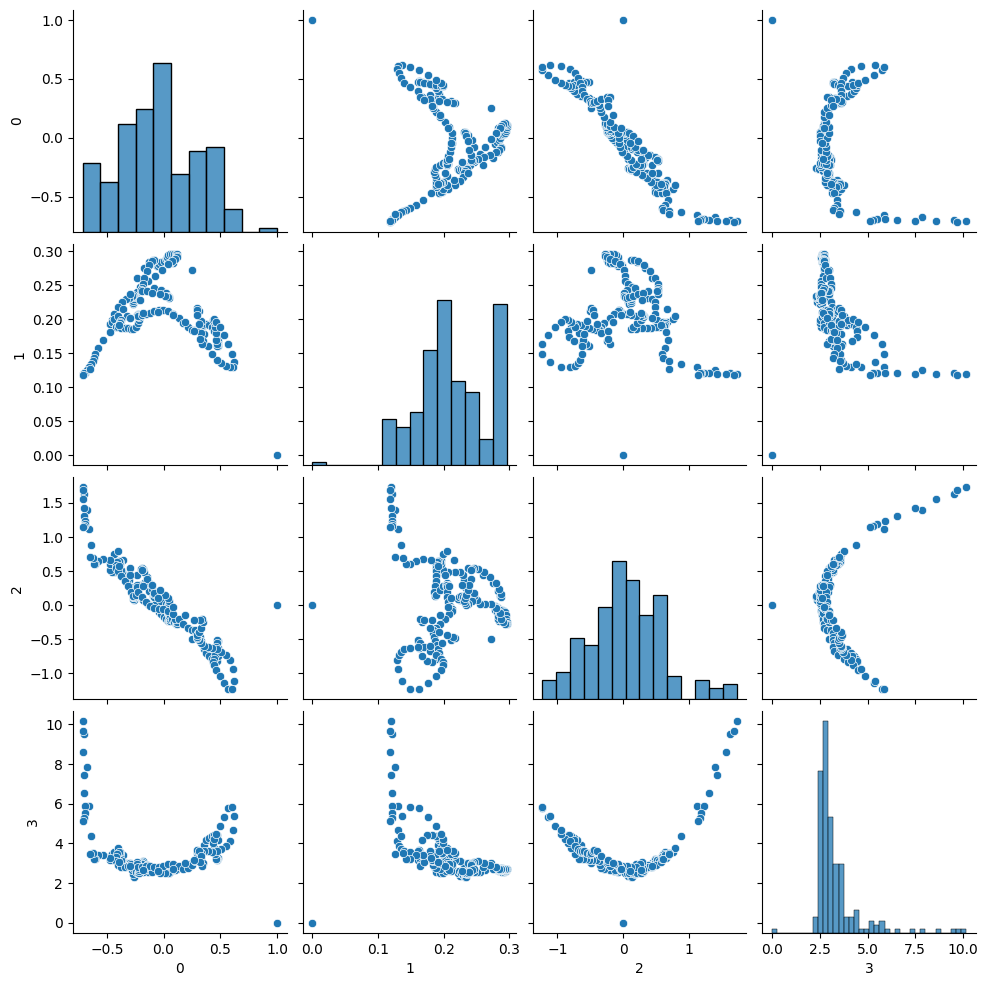

In [10]:
import seaborn as sns
import pandas as pd
sns.pairplot(pd.DataFrame(features), markers=["o", "x"], diag_kind="hist")
plt.show()  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_ol

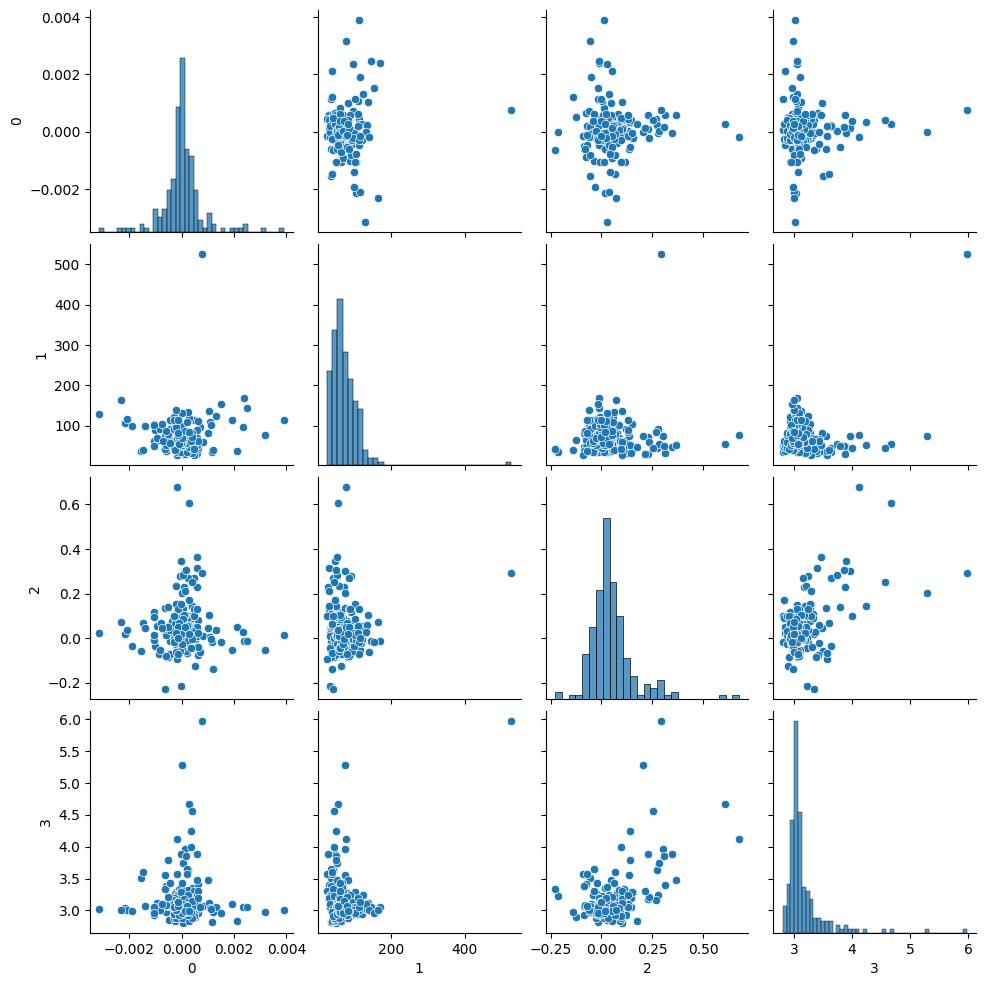

In [11]:
features_raw = compute_node_features(data)
sns.pairplot(pd.DataFrame(features_raw), markers=["o", "x"], diag_kind="hist")
plt.show() 

In [12]:
features.shape

(200, 4)

In [13]:
thresholded = apply_threshold(windowed, threshold=0.2)
print(f"Thresholded data shape: {thresholded.shape}")
graphs = build_dynamic_graphs(thresholded, features[:, 1])


Thresholded data shape: (478, 200, 200)


In [ ]:
#save_graphs(graphs, 'data/processed/snapshots')